In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load data
loan = pd.read_csv("loan.csv",low_memory=False);

In [2]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## It is observed that there are a lot of columns with all null values. Let's first remove them

In [3]:
loan.dropna(axis=1,inplace=True, how='all')
loan.shape

(39717, 57)

## Let's remove single valued column as they won't contribute to our analysis.

In [4]:
a = loan.nunique() > 1
loan = loan.loc[:,a]
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [5]:
loan.shape

(39717, 48)

## some columns correspond to the post approval of loan
- We are analyzing the user details and the driving factors of loan defaulting before approving loan.
- So we can safely remove the columns / variables corresponding to that scenario.
- Also there are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state". 
- The above features or columns doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them. 
- "desc" has description (text data) which we cannot do anythhing about for now. So removing the column.
- "out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis. So removing them. 
- "funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the earlier column.


In [6]:
loan.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" ,  "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [7]:
loan.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [8]:
loan.shape

(39717, 22)

In [9]:
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### Since loan status "Current" doesnt give any info for our analysis for approving or rejecting application, so dropping this data makes sense

In [10]:
loan = loan[loan['loan_status'] != "Current"]
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Checking for missing values

In [11]:
(loan.isna().sum()/len(loan.index))*100

loan_amnt               0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.129611
total_acc               0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

## we observe there are columns with missing or na values. We'll fix them
### Handling Missing values
 - columns with missing values are "emp_length", "revol_util"
 - So before doing that, lets see what kind of data each column has. 

In [12]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt_inv       38577 non-null  float64
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  dti                   38577 non-null  float64
 15  earliest_cr_line   

### The above value counts shows that the 10+ years value has far higher frequency than that of the next most frequent value. 
- This means that we can safely assign the value of mode i.e 10+ years to the null values in the column.
- Also the missing values are in very low percentage. So imputung with mode value will not  affect the analysis much.

In [13]:
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace = True)
loan.emp_length.isna().sum()

0

In [14]:
loan.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan.revol_util.isna().sum()

0

In [15]:
loan.shape

(38527, 22)

## Standardizing the data 
- "revol_util" & "int_rate" column has % in it. so we'll remove percentage from it 
- "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
- Although the datatype of "term" is arguable to be an integer, there are only two values in the whole column and it might as well be declared a categorical variable. 

In [16]:
loan.revol_util = pd.to_numeric(loan.revol_util.apply(lambda x : x.split('%')[0]))

In [17]:
loan.int_rate = pd.to_numeric(loan.int_rate.apply(lambda x : x.split('%')[0]))

In [18]:
loan.emp_length = pd.to_numeric(loan.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [19]:
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9,0.0
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4,0.0
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10,0.0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37,0.0
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12,0.0


In [20]:
loan.emp_length.value_counts()

10    9517
0     4496
2     4286
3     4008
4     3335
5     3190
1     3163
6     2165
7     1708
8     1433
9     1226
Name: emp_length, dtype: int64

## Outlier Treatment

In [21]:
# here are some of the global settings
colors = ["#a9fea9","#fca9a9"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))

<Axes: >

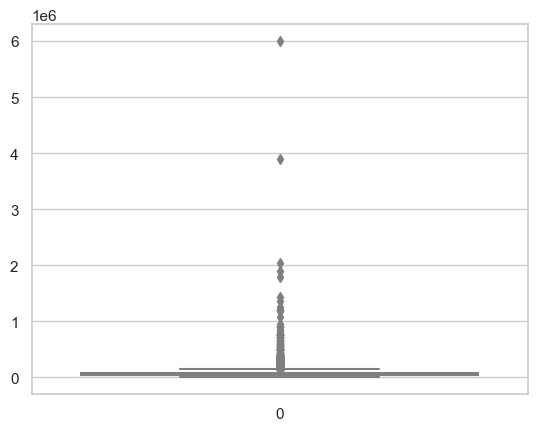

In [22]:
sns.boxplot(loan['annual_inc'])

#### Clearly indincating the presence of outliers.
- So, Removing them.
- Let's see the quantile info and take an appropriate action.
- The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
- So, considering threshold for removing outliers as 0.95

In [23]:
quantile_info = loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [24]:
per_95_annual_inc = loan['annual_inc'].quantile(0.95)
loan = loan[loan.annual_inc <= per_95_annual_inc]

<Axes: >

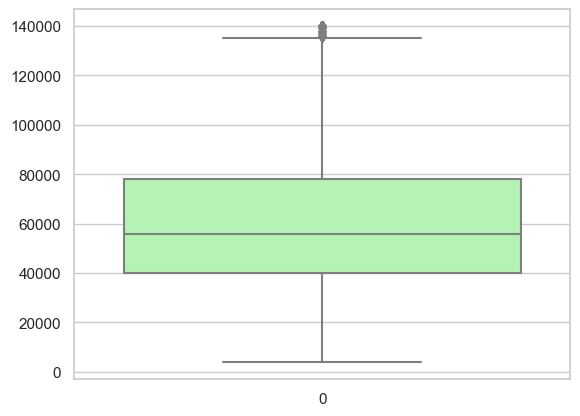

In [25]:
sns.boxplot(loan['annual_inc'])

### Now the "annual_inc" data looks good and proceeding next. Let's analyze other numerical variables which could possibly have outliers.
- dti
- loan_amnt
- funded_amnt_inv 

<Axes: >

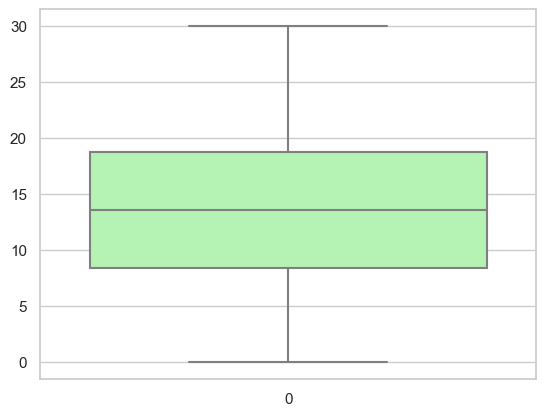

In [26]:
sns.boxplot(loan.dti)

<Axes: >

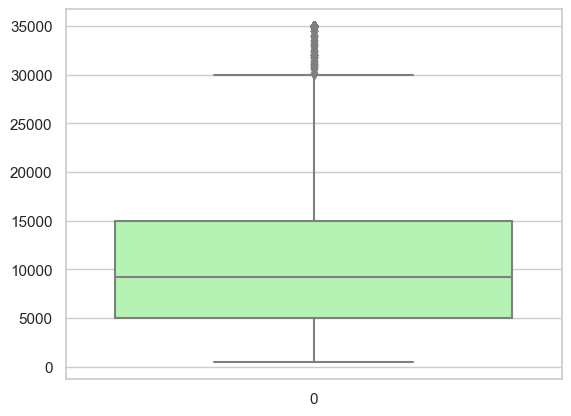

In [27]:
sns.boxplot(loan.loan_amnt)

In [28]:
loan.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

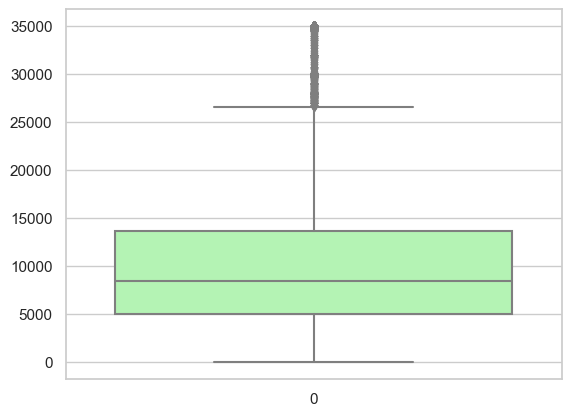

In [29]:
sns.boxplot(loan.funded_amnt_inv)

In [30]:
loan.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8396.342174
0.750    13649.999283
0.900    19750.000000
0.950    23949.287805
0.970    24975.000000
0.975    25350.000000
0.980    27953.287538
0.985    29925.000000
0.990    31966.803281
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these above columns.

# Let's proceed with EDA

In [31]:
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
loan['loan_status_num'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
loan.head()


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,loan_status_num
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,credit_card,27.65,Jan-85,1,3,0,83.7,9,0.0,0
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,car,1.00,Apr-99,5,3,0,9.4,4,0.0,1
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,small_business,8.72,Nov-01,2,2,0,98.5,10,0.0,0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,other,20.00,Feb-96,1,10,0,21.0,37,0.0,0
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,wedding,11.20,Nov-04,3,9,0,28.3,12,0.0,0


/var/folders/7d/2ckg22xj4y7c_dfj3rt9s70m0000gr/T/ipykernel_89910/1398459564.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=loan.corr(), cmap='BuGn', figsize=(12,12))


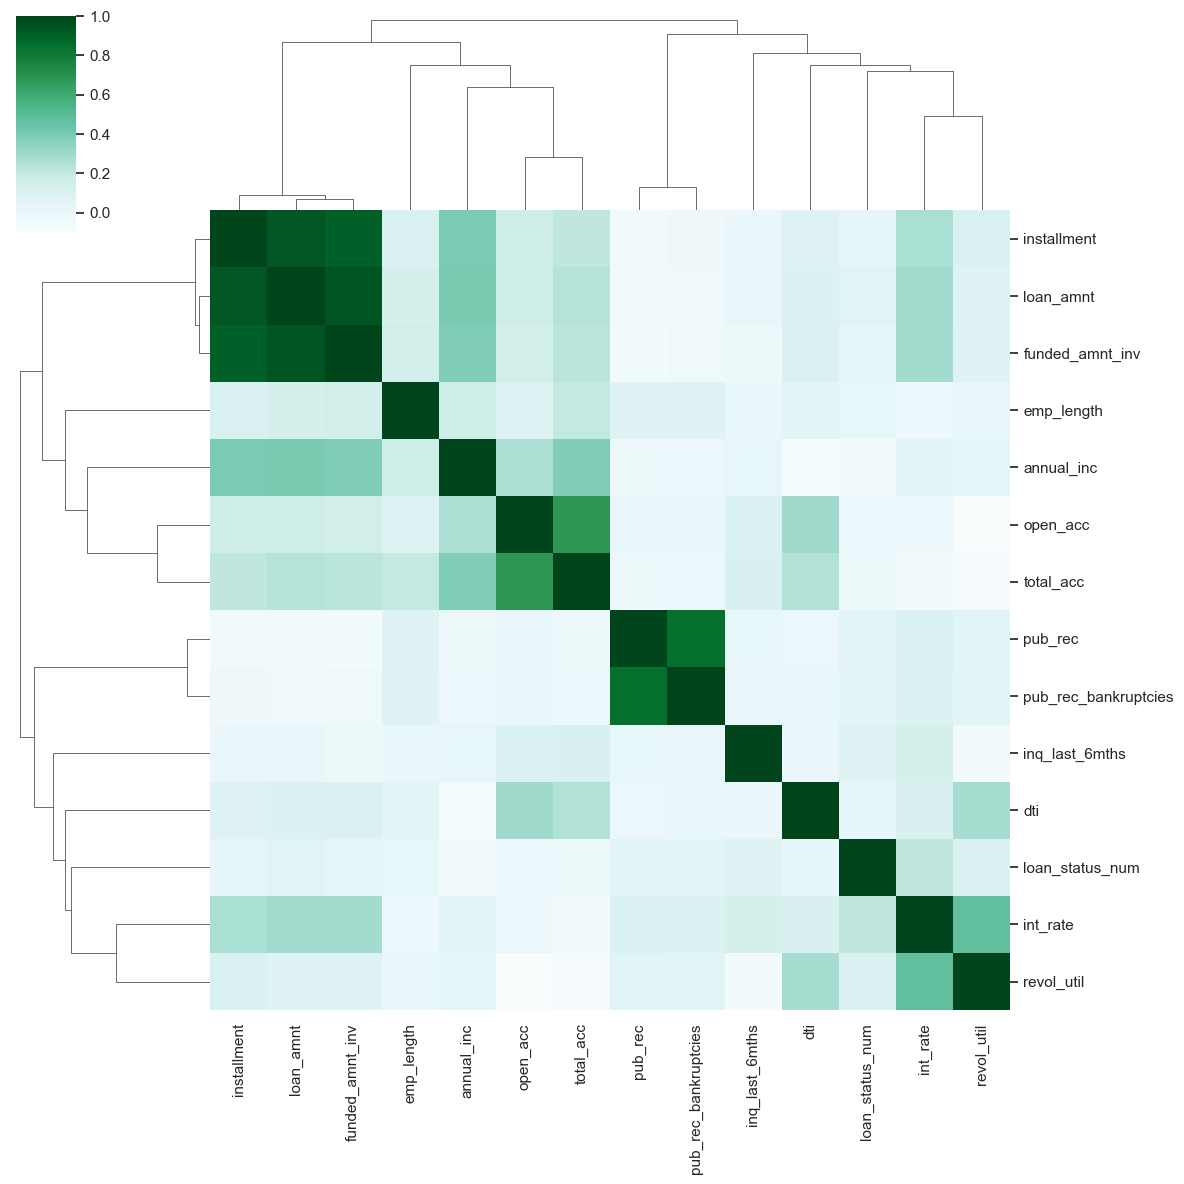

In [32]:
sns.set_style("whitegrid")
sns.clustermap(data=loan.corr(), cmap='BuGn', figsize=(12,12))
plt.show()

Since we know darker the value heigher the correlation , we can clearly see loan_amnt, funded_amnt, funded_amnt_inv and installment have huge correlation
These fields are proportional to each other. Next, the public records related fields pub_rec & pub_rec_bankrupcies and number of accounts related fields open_acc & total_acc are correlated.

## Visualizing Categorical Data 
### As we already have grade column, extracting only subgrade (int level value) from the sub_grade variable
- We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots


<Axes: xlabel='loan_status', ylabel='count'>

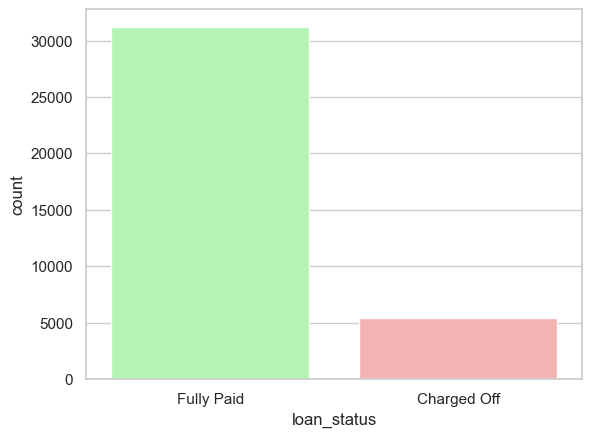

In [33]:
sns.countplot(x = 'loan_status', data = loan)

In [34]:
loan.sub_grade = pd.to_numeric(loan.sub_grade.apply(lambda x : x[-1]))
loan.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

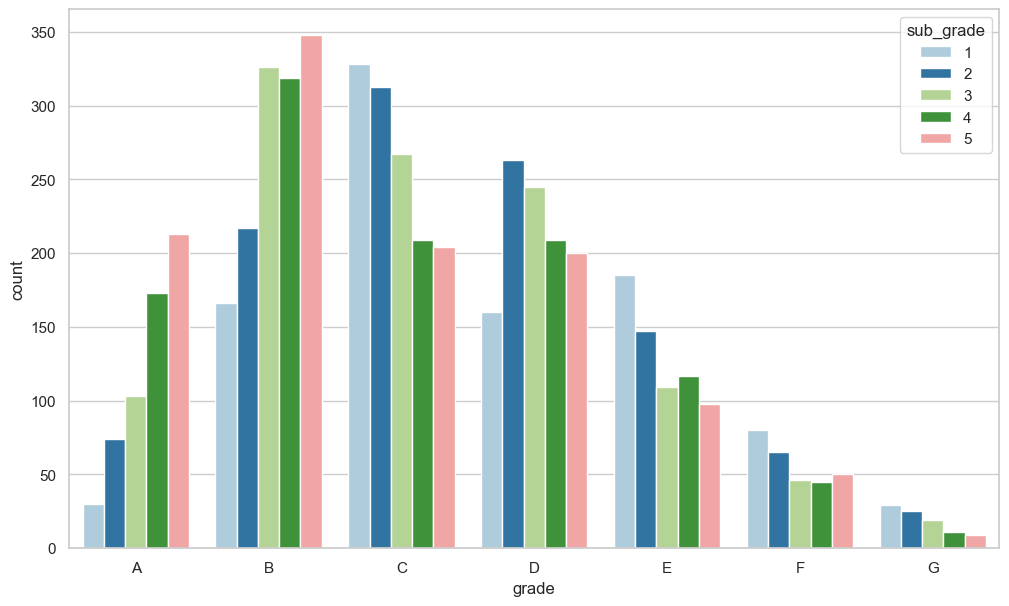

In [35]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('Paired')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan[loan.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

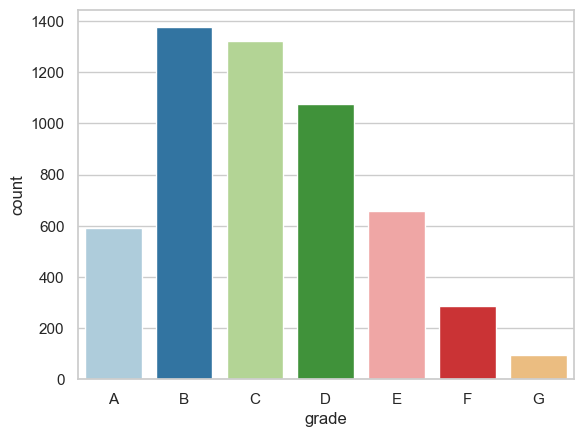

In [36]:
sns.countplot(x = 'grade', data = loan[loan.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

####  Analyzing home_ownership

In [37]:
#checking unique values for home_ownership
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

#### There are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'

In [38]:
#replacing 'NONE' with 'OTHERS'
loan['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

<Axes: xlabel='home_ownership', ylabel='count'>

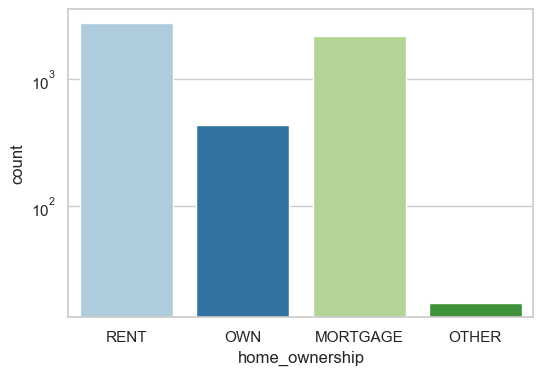

In [39]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan[loan['loan_status']=='Charged Off'])

####  Analyzing purpose

<Axes: xlabel='count', ylabel='purpose'>

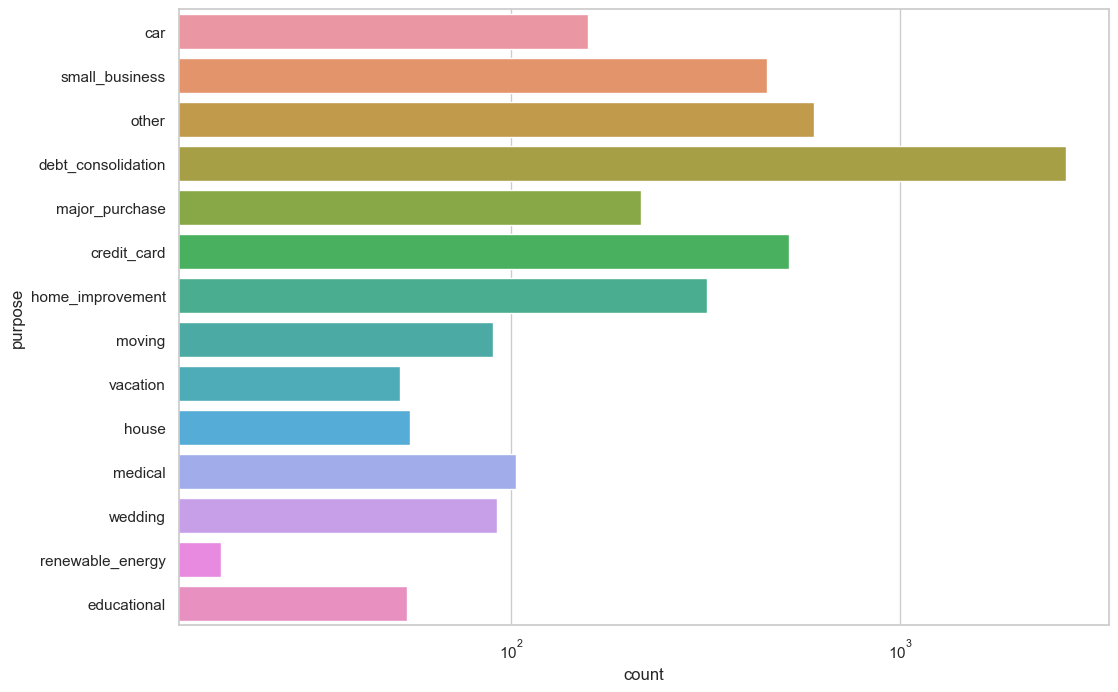

In [40]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan[loan.loan_status == 'Charged Off'])


#### Creating bins for numerical variable to make them categorical


In [41]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan['int_rate_groups'] = pd.cut(loan['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan['open_acc_groups'] = pd.cut(loan['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan['revol_util_groups'] = pd.cut(loan['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan['total_acc_groups'] = pd.cut(loan['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

#### Analyzing interest rate wrt the interest rate bins created

/var/folders/7d/2ckg22xj4y7c_dfj3rt9s70m0000gr/T/ipykernel_89910/3587293396.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


<Axes: xlabel='emp_length', ylabel='count'>

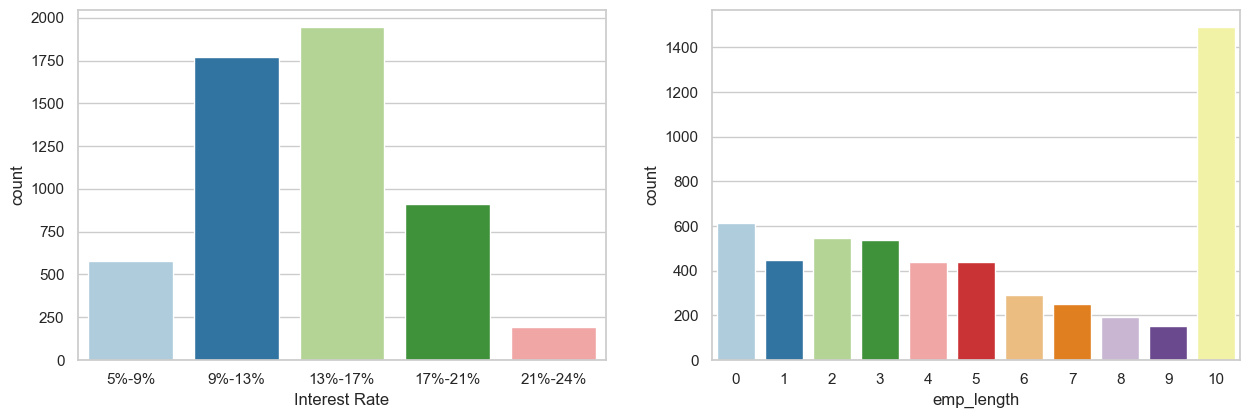

In [42]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan[loan.loan_status == 'Charged Off'])

#### Similarly analyzing open_acc,revol_util,total_acc,annual_inc

<Axes: xlabel='open_acc_groups', ylabel='count'>

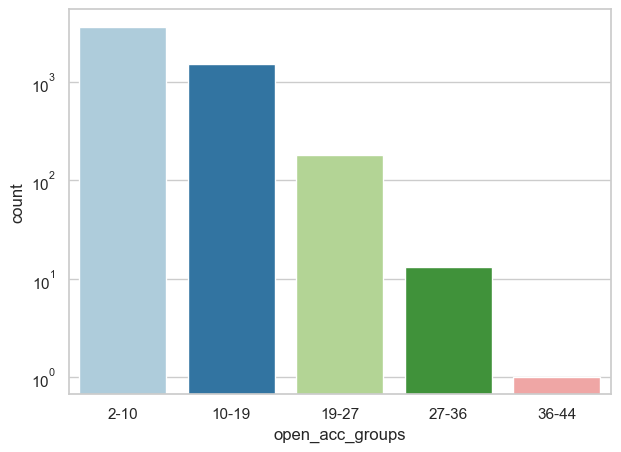

In [43]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan[loan.loan_status == 'Charged Off'])

<Axes: xlabel='revol_util_groups', ylabel='count'>

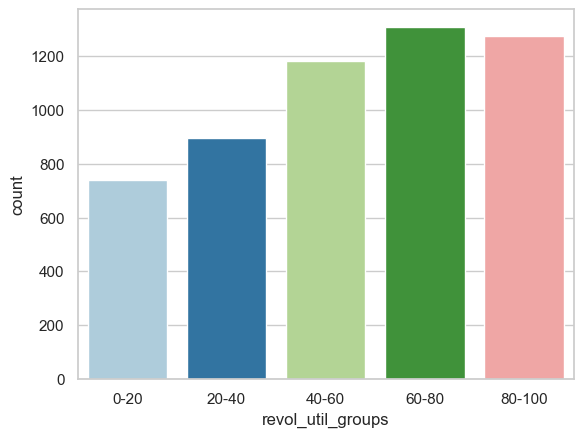

In [44]:
sns.countplot(x='revol_util_groups', data=loan[loan.loan_status == 'Charged Off'])

<Axes: xlabel='total_acc_groups', ylabel='count'>

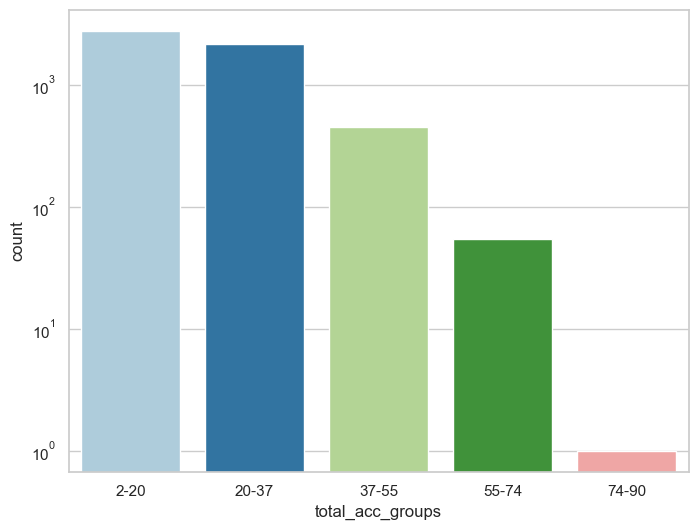

In [45]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan[loan.loan_status == 'Charged Off'])

<Axes: xlabel='annual_inc_groups', ylabel='count'>

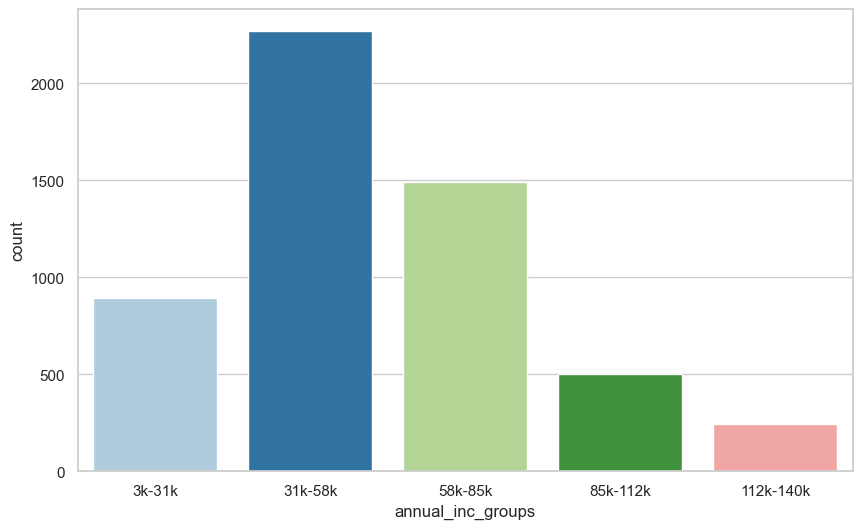

In [46]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan[loan.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='term'>

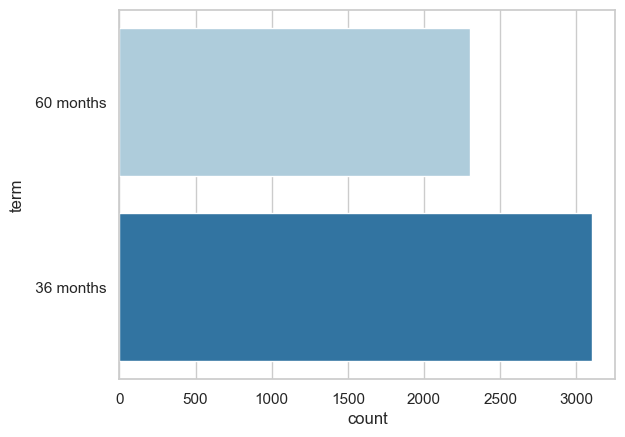

In [47]:
sns.countplot(y='term', data=loan[loan['loan_status']=='Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

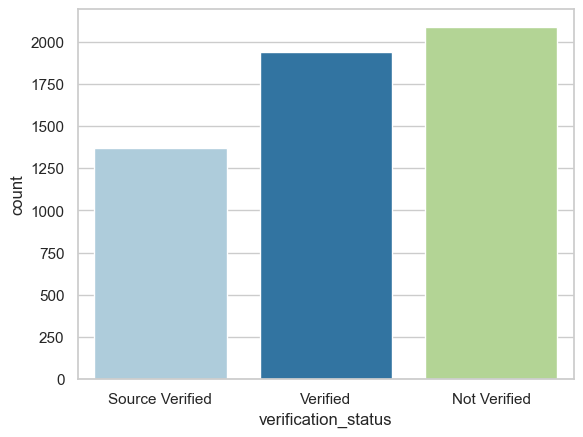

In [48]:
sns.countplot(x='verification_status', data=loan[loan['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

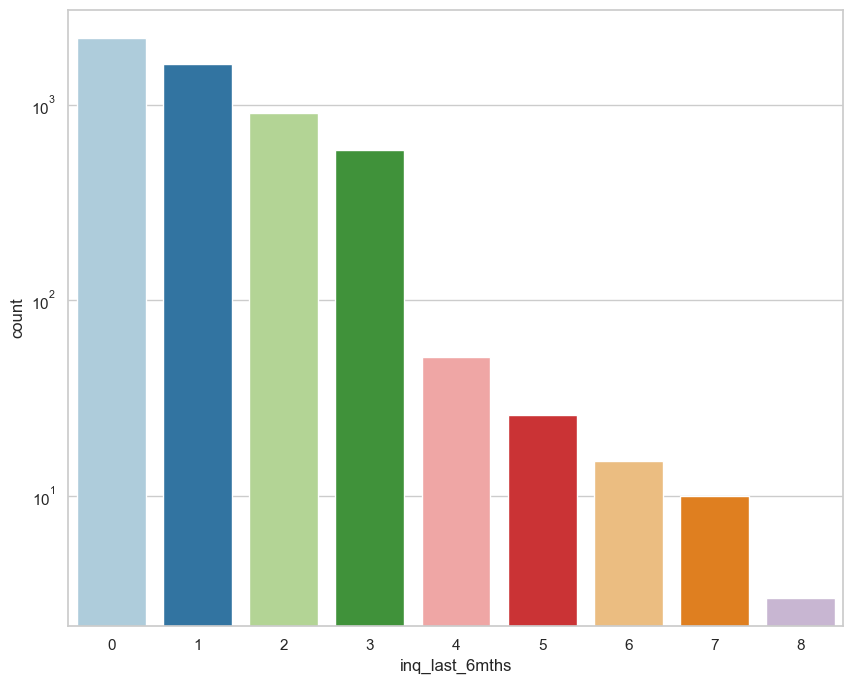

In [49]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan[loan['loan_status']=='Charged Off'])

<Axes: xlabel='pub_rec', ylabel='count'>

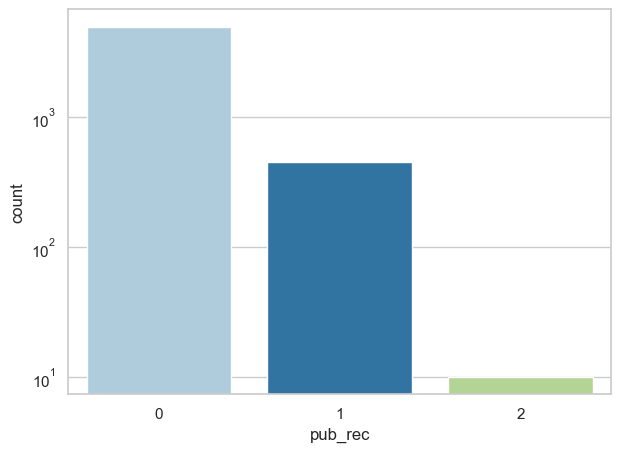

In [50]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan[loan['loan_status']=='Charged Off'])

### Analyzing by issued month and year


In [51]:
## Extracting month and year
df_month_year = loan['issue_d'].str.partition("-", True)     
loan['issue_month']=df_month_year[0]                       
loan['issue_year']='20' + df_month_year[2]

In [52]:
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_acc,pub_rec_bankruptcies,loan_status_num,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,9,0.0,0,9%-13%,2-10,80-100,2-20,3k-31k,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,4,0.0,1,13%-17%,2-10,0-20,2-20,3k-31k,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,10,0.0,0,13%-17%,2-10,80-100,2-20,3k-31k,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,37,0.0,0,13%-17%,2-10,20-40,20-37,31k-58k,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,12,0.0,0,5%-9%,2-10,20-40,2-20,31k-58k,Dec,2011


<Axes: xlabel='issue_year', ylabel='count'>

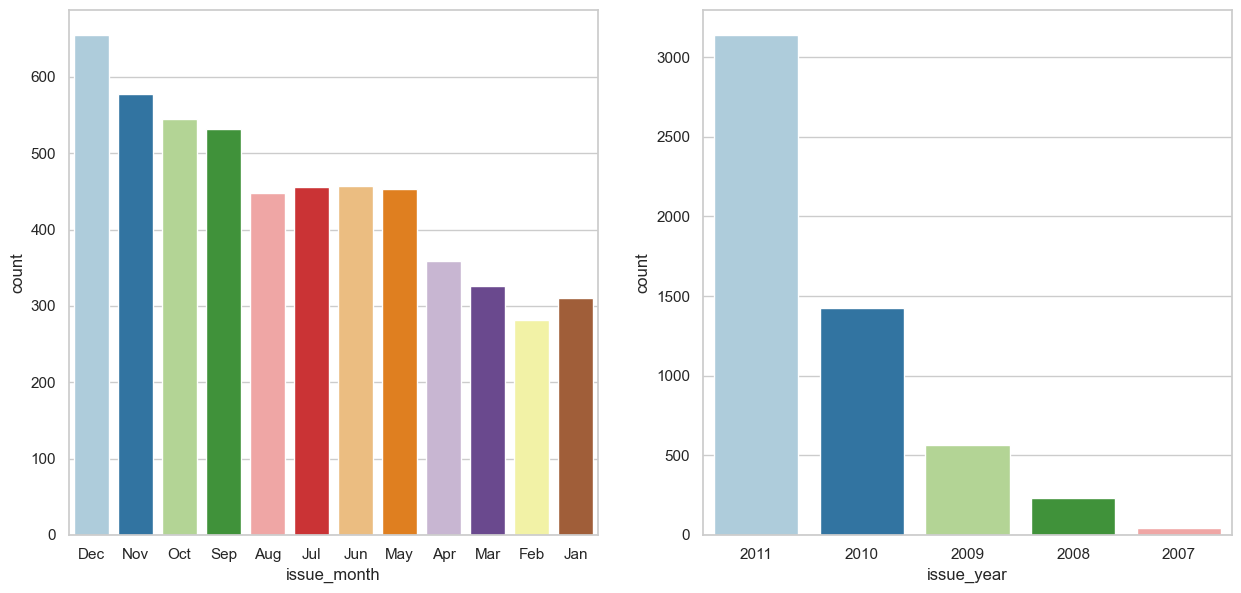

In [53]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan[loan['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan[loan['loan_status']=='Charged Off'])

### Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years

### Analyzing installment,dti, loan_amnt 


In [54]:
loan['installment_groups'] = pd.cut(loan['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan['funded_amnt_inv_group'] = pd.cut(loan['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan['loan_amnt_groups'] = pd.cut(loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['dti_groups'] = pd.cut(loan['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

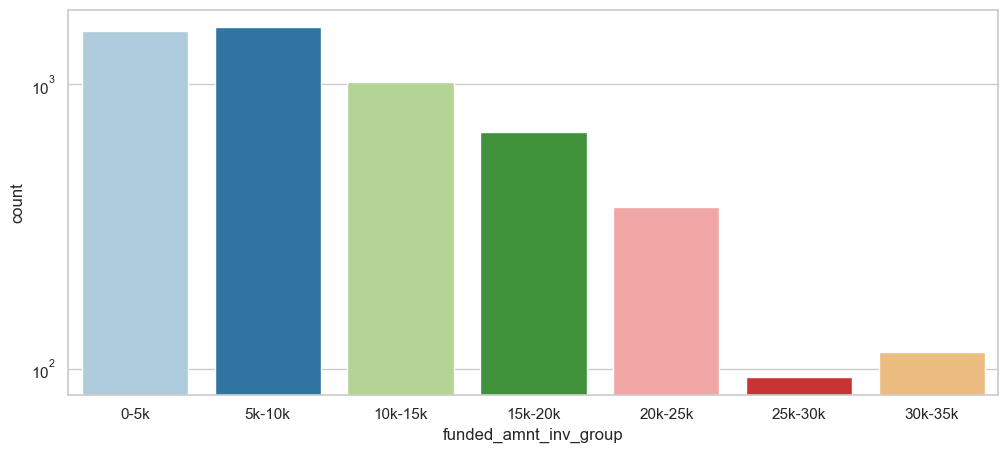

In [55]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan[loan['loan_status']=='Charged Off'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

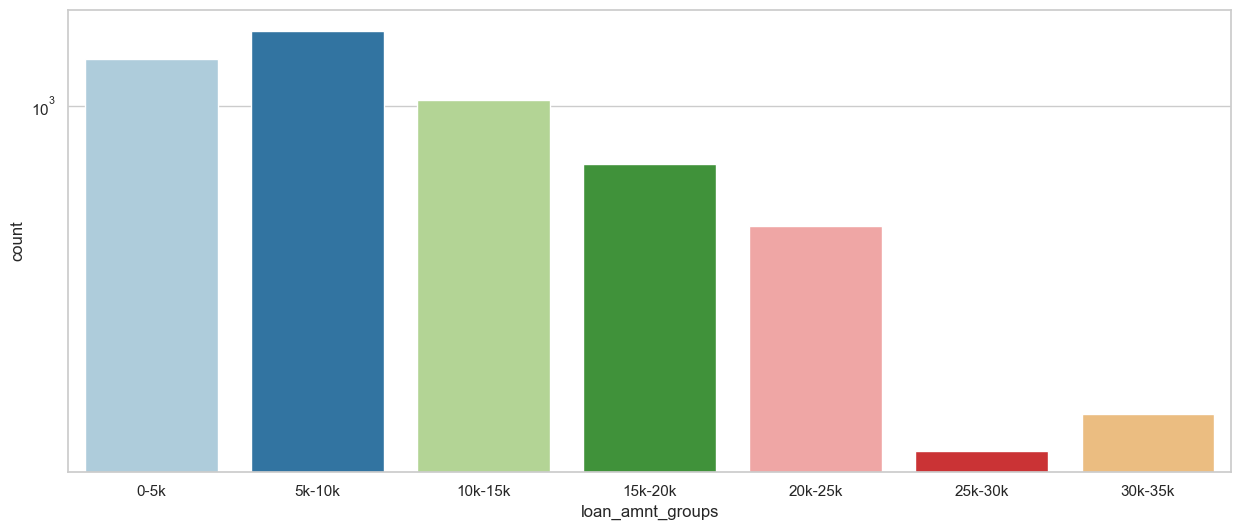

In [56]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan[loan['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

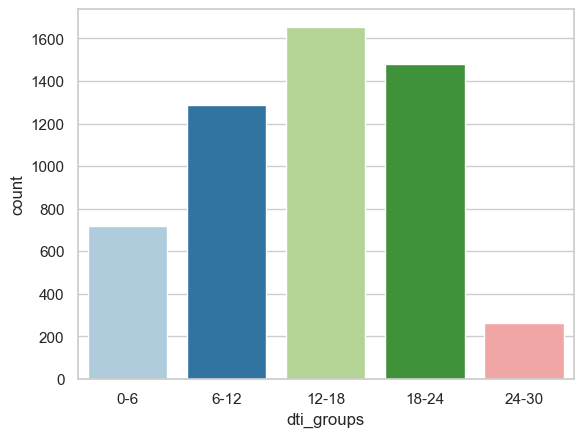

In [57]:
sns.countplot(x='dti_groups', data=loan[loan['loan_status']=='Charged Off'])

<Axes: xlabel='installment_groups', ylabel='count'>

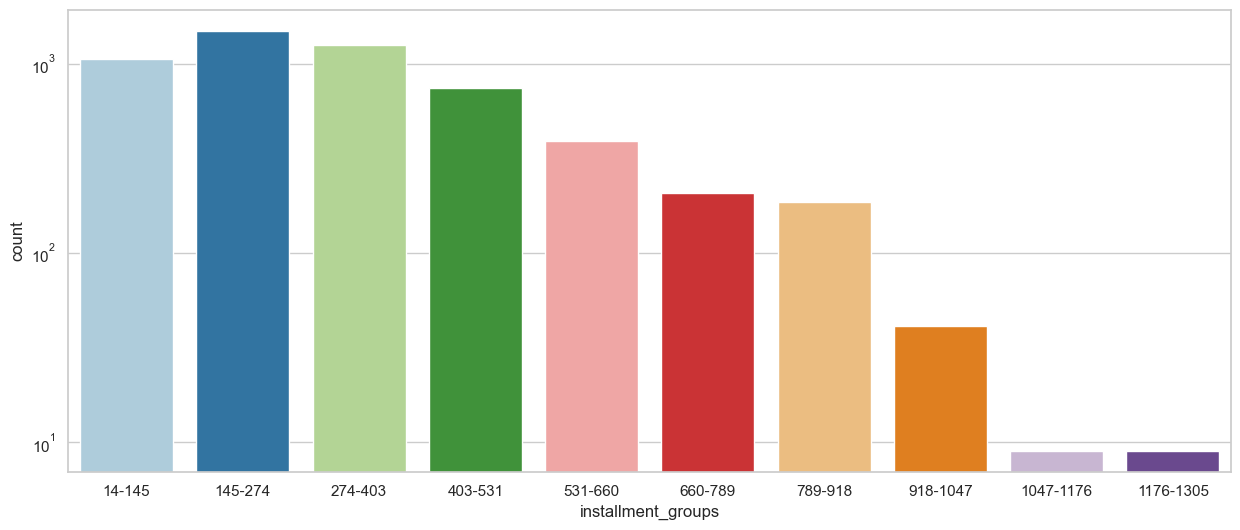

In [58]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan[loan['loan_status']=='Charged Off'])

# Observations

### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when : 

- Applicants having house_ownership as 'RENT'
- Applicants who use the loan to clear other debts
- Applicants who receive interest at the rate of 13-17%
- Applicants who have an income of range 31201 - 58402
- Applicants who have 20-37 open_acc
- Applicants with employement length of 10
- When funded amount by investor is between 5000-10000
- Loan amount is between 5429 - 10357
- Dti is between 12-18
- When monthly installments are between 145-274
- Term of 36 months
- When the loan status is Not verified
- When the no of enquiries in last 6 months is 0
- When the number of derogatory public records is 0
- When the purpose is 'debt_consolidation'
- Grade is 'B'
- And a total grade of 'B5' level.


### Also there is a very interesting observation from the date issued. The late months of an year indicated the high possibility of defaulting. 
- The high number of loan defaults in 2011 could be due to the financial crisis in USA (Assuming the data is of US origin)

## Analysing annual income with other columns for more insights

#### 1.Annual income vs loan purpose

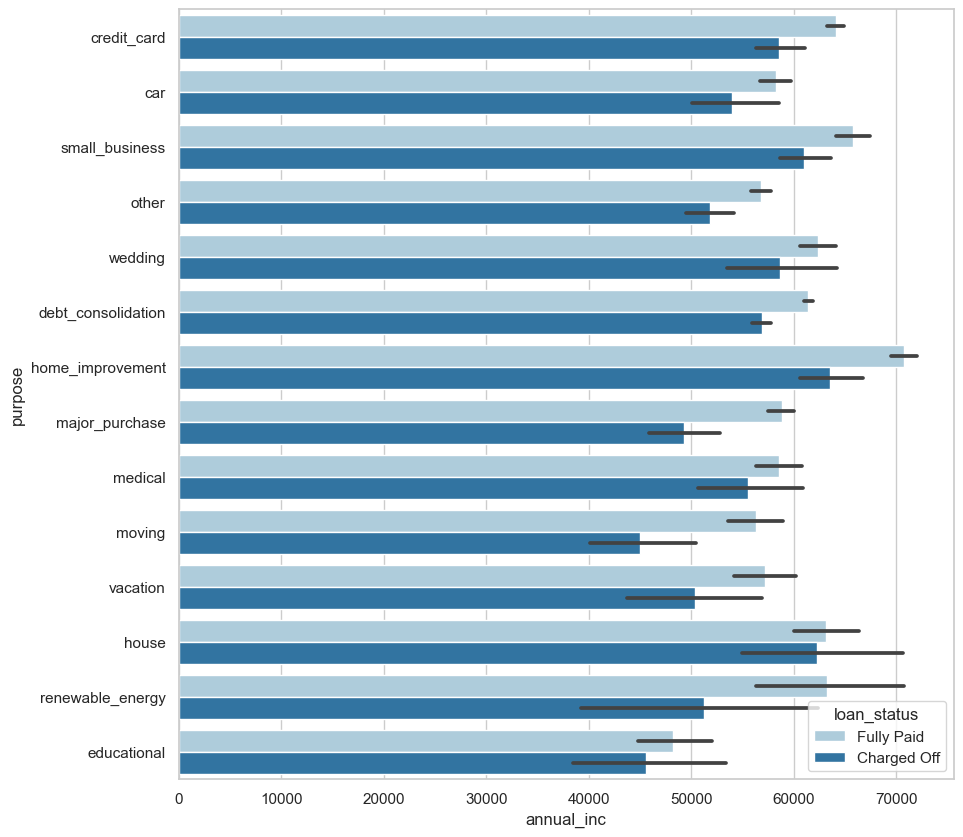

In [59]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='annual_inc', y='purpose', hue ='loan_status',palette="Paired")
plt.show()

### Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest. 
- Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

#### 2.Annual income vs home ownership


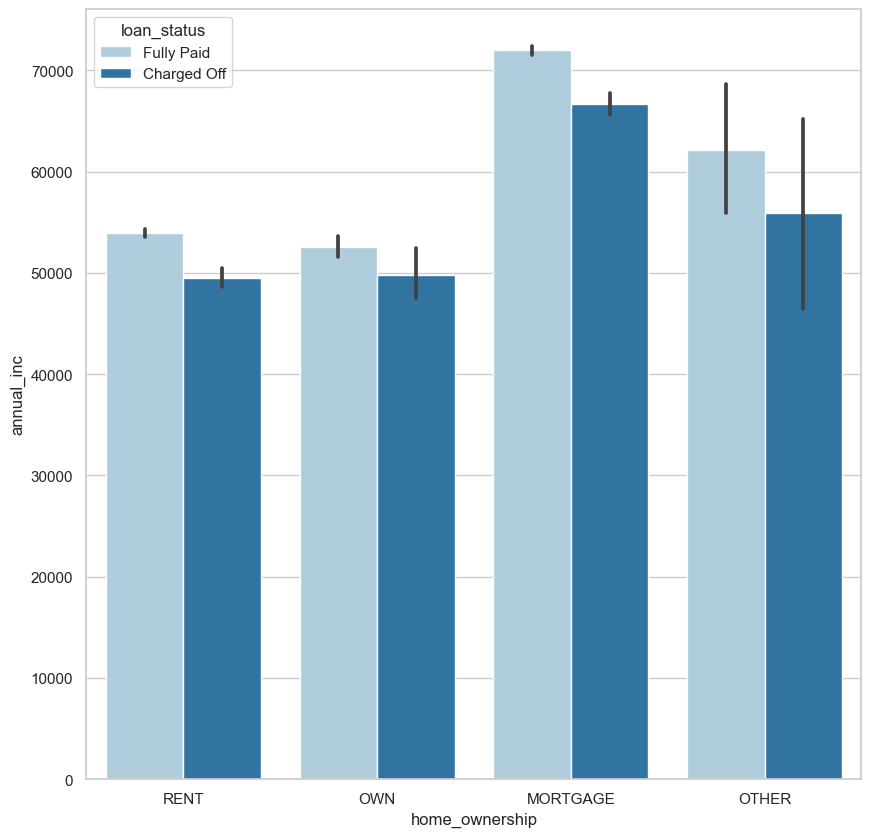

In [60]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='home_ownership', y='annual_inc', hue ='loan_status',palette="Paired")
plt.show()

### Annual Income vs Loan amount

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

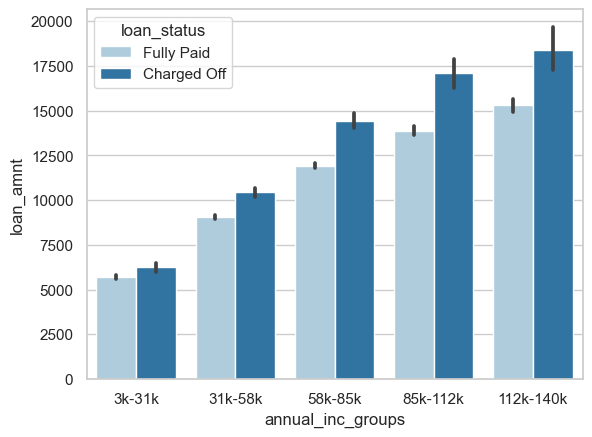

In [61]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan)

### Across all the income groups, the loan_amount is higher for people who defaulted.

#### 3. Annual income vs int_rate


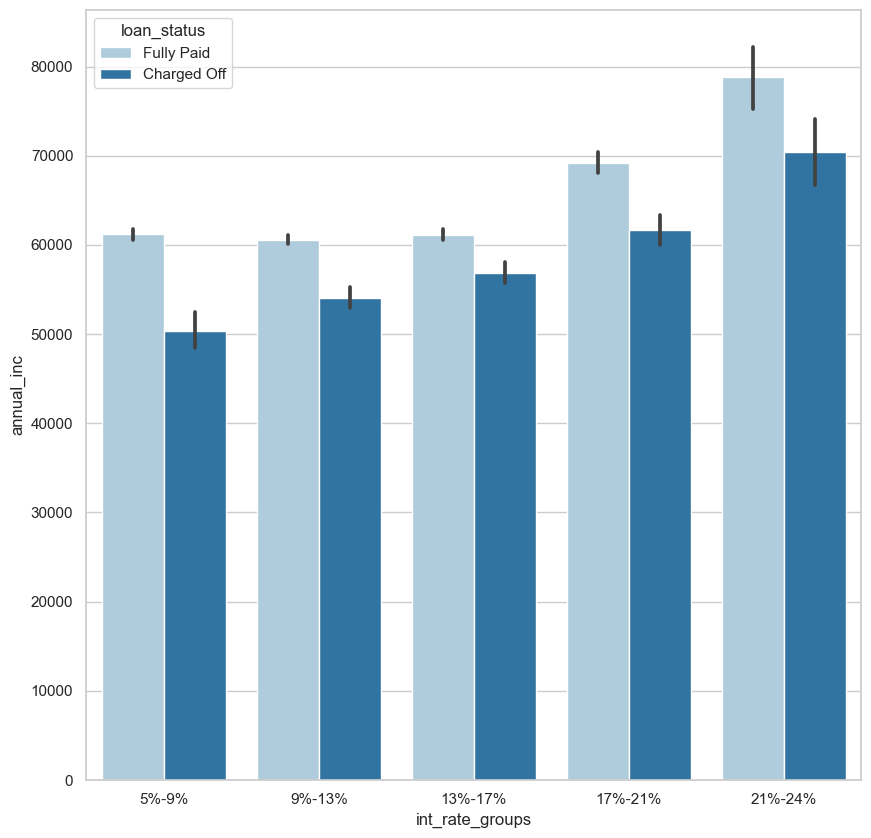

In [62]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="Paired")
plt.show()

## Analysing loan_amount with other columns for more insights 

#### 1.Loan Amount vs Interest Rate

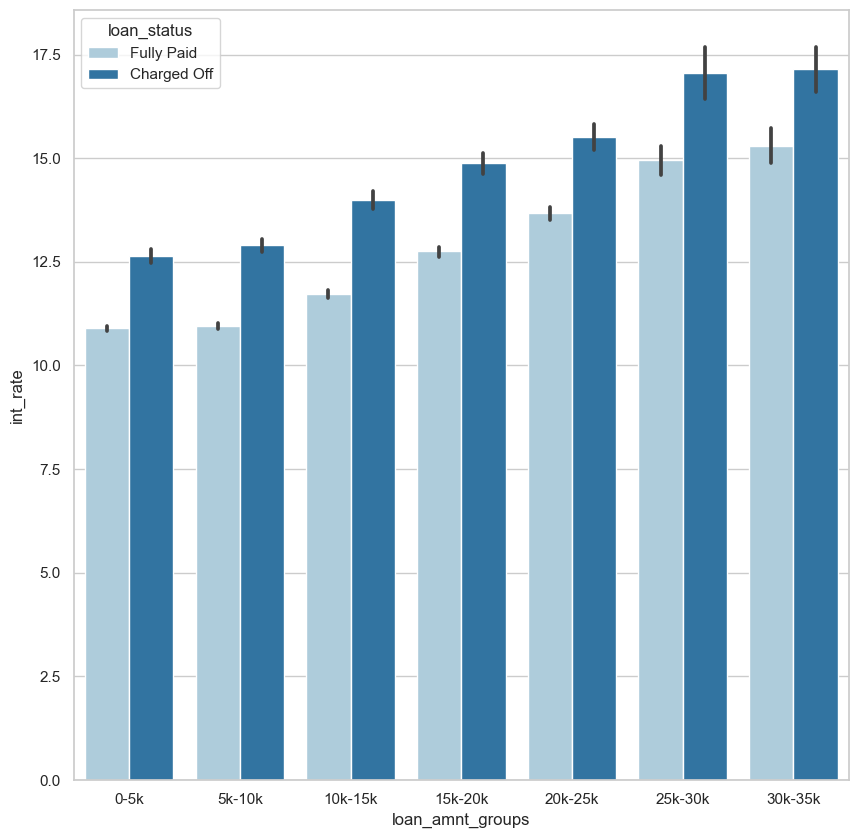

In [63]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="Paired")
plt.show()

#### 2.Loan vs Loan purpose

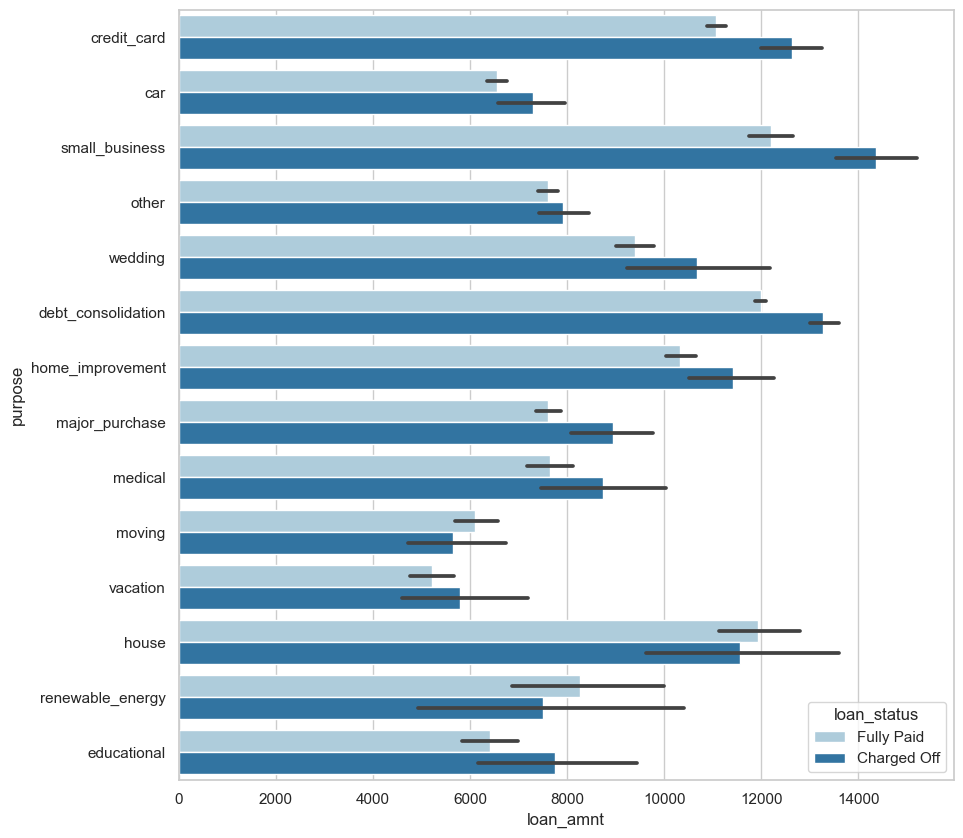

In [64]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='loan_amnt', y='purpose', hue ='loan_status',palette="Paired")
plt.show()

####  3.Loan vs House Ownership

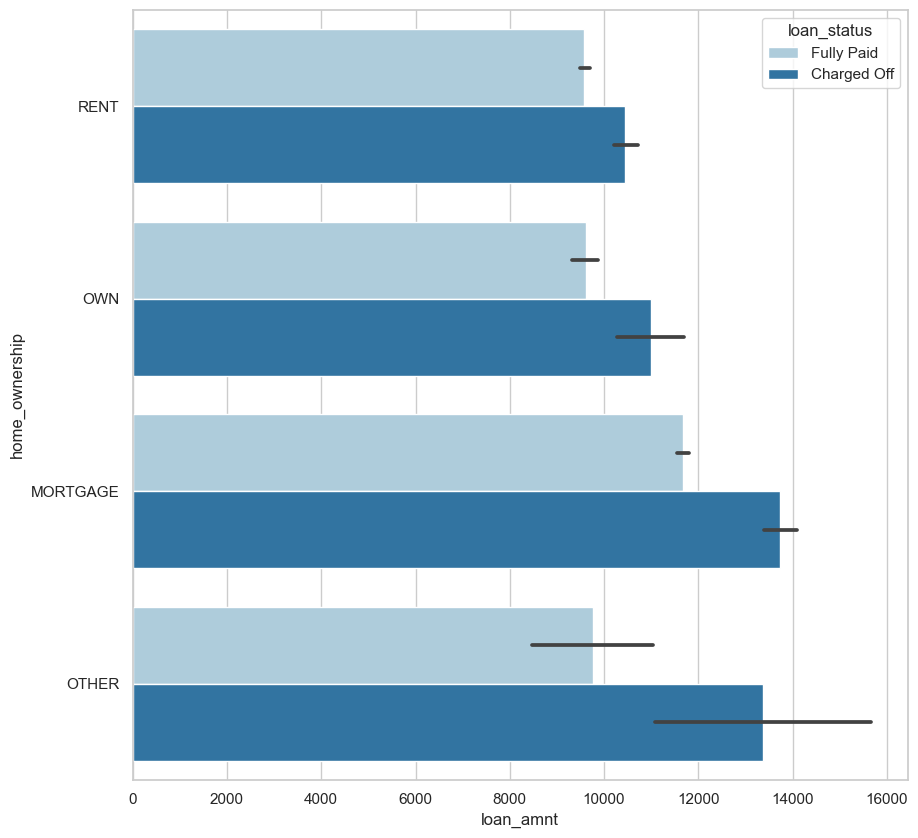

In [65]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="Paired")
plt.show()

#### 4.Loan amount vs month issued and year issued


<Axes: xlabel='issue_year', ylabel='loan_amnt'>

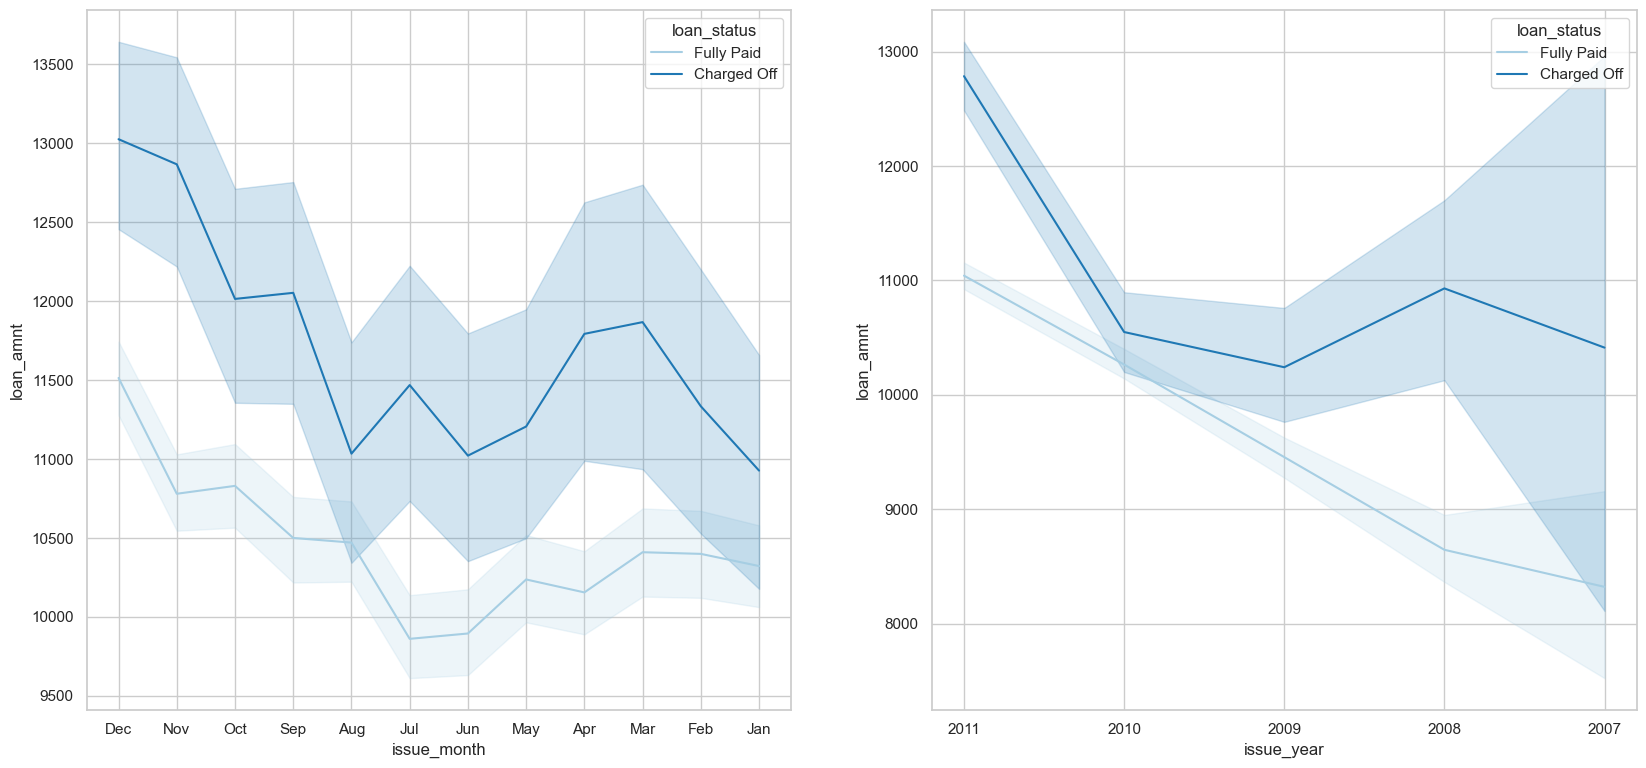

In [66]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan,y='loan_amnt', x='issue_month', hue ='loan_status',palette="Paired")
plt.subplot(222)
sns.lineplot(data =loan,y='loan_amnt', x='issue_year', hue ='loan_status',palette="Paired")


#### 5.Loan amount vs Grade

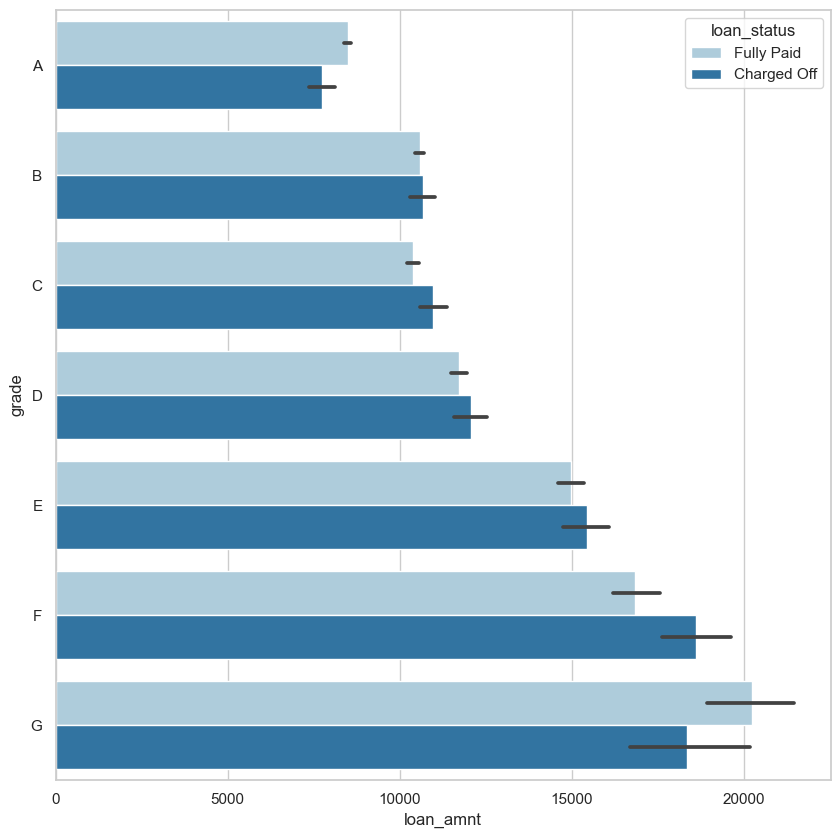

In [67]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='loan_amnt', y='grade', hue ='loan_status',palette="Paired", order=['A','B','C','D','E','F','G'])
plt.show()

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

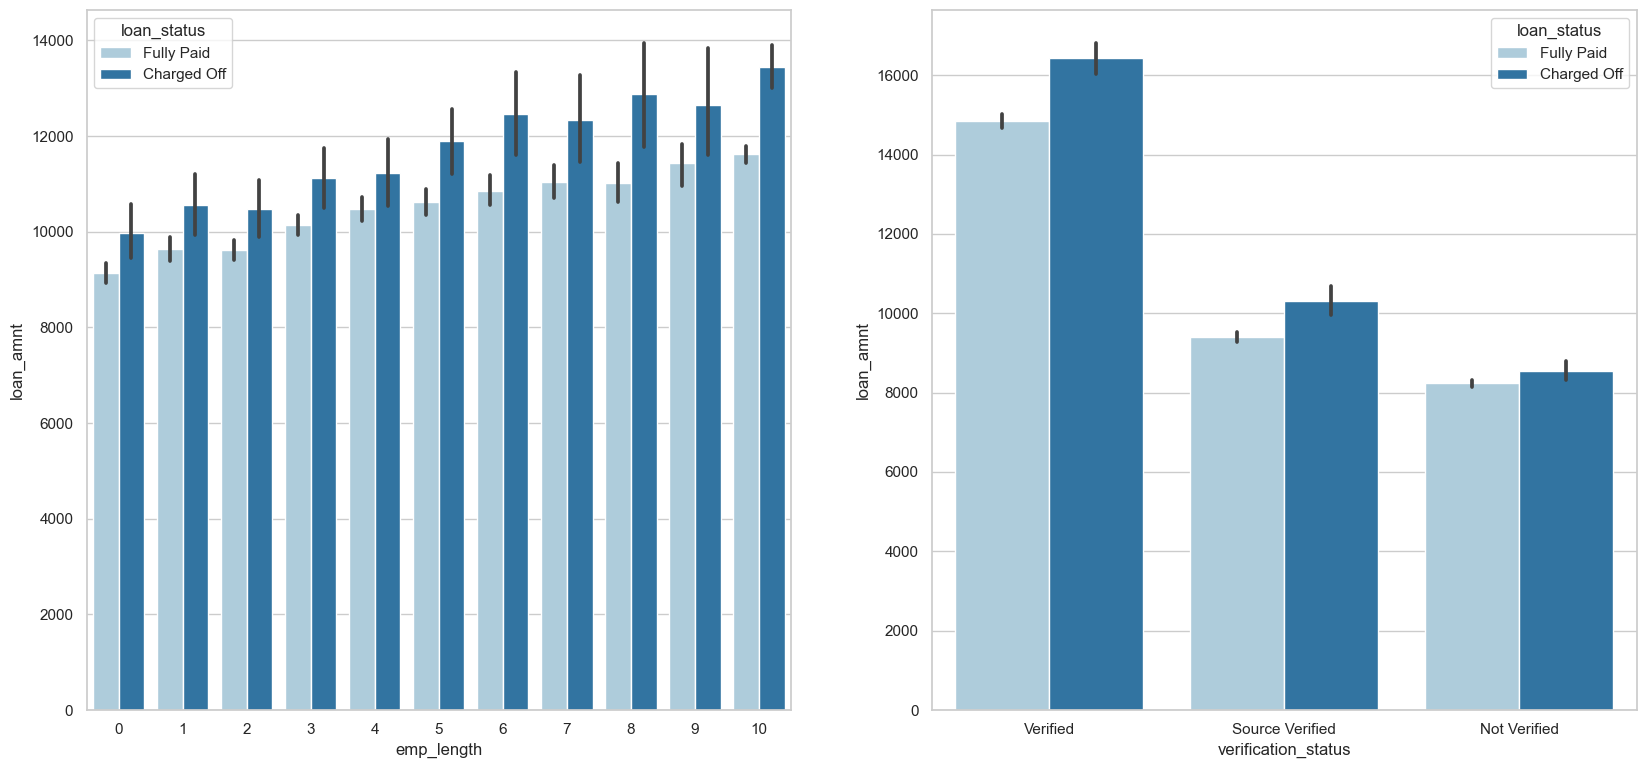

In [68]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan,y='loan_amnt', x='emp_length', hue ='loan_status',palette="Paired")
plt.subplot(222)
sns.barplot(data =loan,y='loan_amnt', x='verification_status', hue ='loan_status',palette="Paired")


### Employees with longer working history got the loan approved for a higher amount. 
- Looking at the verification status data, verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the loans with higher values.

#### grade vs interest rate

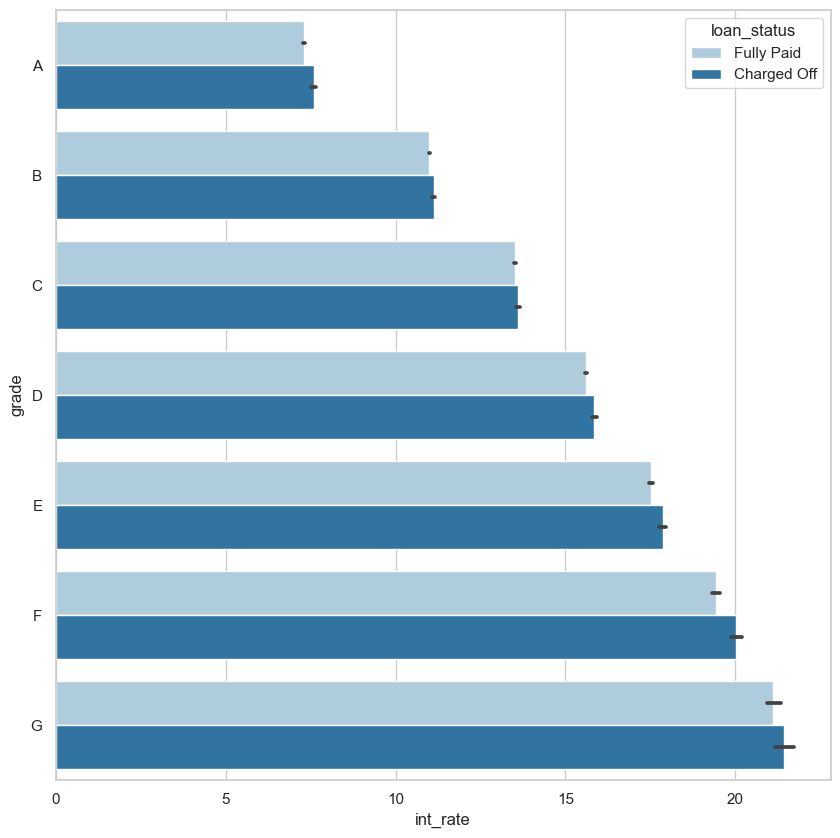

In [69]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='int_rate', y='grade', hue ='loan_status',palette="Paired", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 640x480 with 0 Axes>

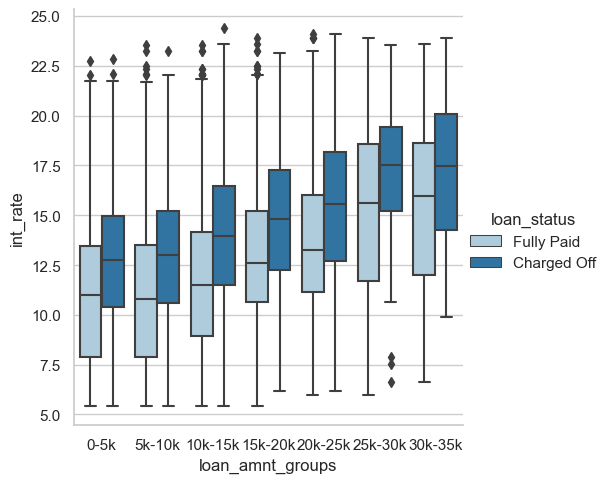

In [70]:
# fig,ax = plt.subplots(figsize = (15,6))
plt.tight_layout()
sns.catplot(data =loan,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="Paired",kind = 'box')

### The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups. 
- This can be a pretty strong driving factor for loan defaulting.

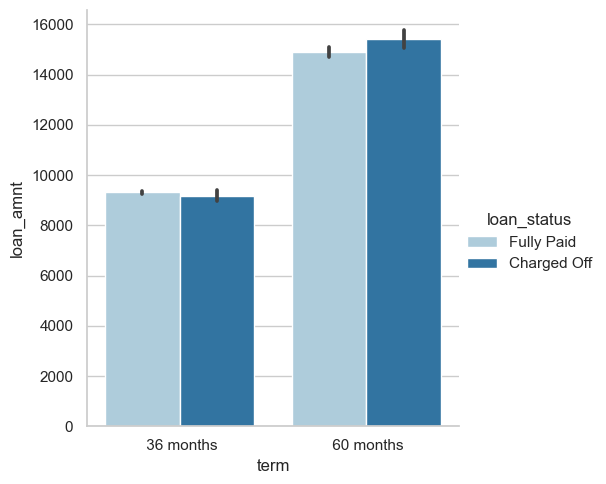

In [71]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan,hue = 'loan_status', kind = 'bar')

### Applicants who applied and defaulted have no significant difference in loan_amounts.
- Which means that applicants applying for long term has applied for more loan. 

# Observations

### The above analysis with respect to the charged off loans. There is a more probability of defaulting when : 

- Applicants taking loan for 'home improvement' and have income of 60k -70k
- Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
- Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
- Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
- When grade is F and loan amount is between 15k-20k
- When employment length is 10yrs and loan amount is 12k-14k 
- When the loan is verified and loan amount is above 16k
- For grade G and interest rate above 20%